# **1**

Пусть случайная величина ξ имеет распределение, задаваемое плотностью **fξ(x) = θ^2xe^(−θx)**. Для каждого θ ∈ {0.5, 2, 8}:

1) Аналитически вычислить **математическое ожидание**, **дисперсию** и
**математическое ожидание квадрата** ξ. Привести в отчет

2) Для **k** ∈ {2^4, 2^5, . . . , 2^15} **построить выборку из k** элементов.

Для каждой из них **посчитать оценки**: математического ожидания, дисперсии и квадрата математического ожидания параметра из варианта.

Для каждой из выборок и оценок **визуализировать** это все на графиках (для каждой оценки — свой график), где по вертикальной оси — оценка, а по горизонтальной — k.

Добавьте горизонтальную линию, отвечающую за аналитически полученную оценку.

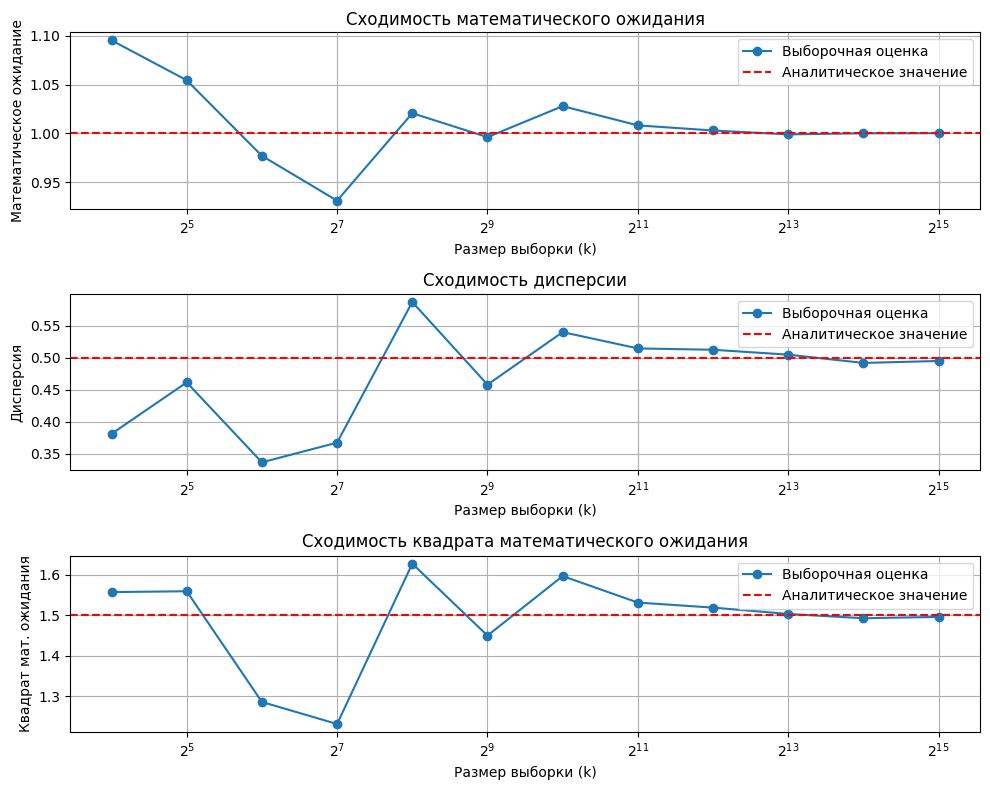

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметр распределения
theta = 2     # Можно менять

# Аналитические значения для распределения f(x) = θ² * x * e^(-θx)
analytical_mean = 2 / theta
analytical_variance = 2 / (theta ** 2)
analytical_mean_square = 6 / (theta ** 2)


# Списки для хранения оценок
means = []
variances = []
mean_squares = []


# Функция для генерации выборки из распределения Гамма с α=2 и β=1/θ
def generate_samples(theta, size):
    return np.random.gamma(2, 1/theta, size)  # Генерация из Gamma(2, 1/θ)

# Диапазон размеров выборок
k_values = [2**i for i in range(4, 16)]  # 2^4, 2^5, ..., 2^15

# Генерация выборок и расчёт оценок
for k in k_values:
    # Генерация выборки
    samples = generate_samples(theta, k)

    # Вычисление выборочных оценок
    means.append(np.mean(samples))  # Оценка мат. ожидания
    variances.append(np.var(samples, ddof=1))  # Оценка дисперсии
    mean_squares.append(np.mean(samples**2))  # Оценка квадрата мат. ожидания


# Построение графиков на основе полученных выборочных оценок
plt.figure(figsize=(10, 8))


# График для математического ожидания
plt.subplot(3, 1, 1)
plt.plot(k_values, means, label='Выборочная оценка', marker='o')
plt.axhline(analytical_mean, color='red', linestyle='--', label='Аналитическое значение')
plt.xscale('log', base=2) # Изменяем масштаб оси x на логарифмический с основанием 2
plt.xlabel('Размер выборки (k)')
plt.ylabel('Математическое ожидание')
plt.title('Сходимость математического ожидания')
plt.legend()              # Добавляем легенду на график
plt.grid()                # Включаем сетки на графике

# График для дисперсии
plt.subplot(3, 1, 2)
plt.plot(k_values, variances, label='Выборочная оценка', marker='o')
plt.axhline(analytical_variance, color='red', linestyle='--', label='Аналитическое значение')
plt.xscale('log', base=2)
plt.xlabel('Размер выборки (k)')
plt.ylabel('Дисперсия')
plt.title('Сходимость дисперсии')
plt.legend()
plt.grid()

# График для квадрата математического ожидания
plt.subplot(3, 1, 3)
plt.plot(k_values, mean_squares, label='Выборочная оценка', marker='o')
plt.axhline(analytical_mean_square, color='red', linestyle='--', label='Аналитическое значение')
plt.xscale('log', base=2)
plt.xlabel('Размер выборки (k)')
plt.ylabel('Квадрат мат. ожидания')
plt.title('Сходимость квадрата математического ожидания')
plt.legend()
plt.grid()


plt.tight_layout()     # Автоматически подстраиваем расположение элементов графика
plt.show()             # Отображение графика

# 2

Дана плотность распределения случайной величины ξ:

fξ,λ,a(x) = λe^(-λ(x-a)) , x>= a

fξ,λ,a(x) =0, else

Пусть (λ, a) = (2, 2)
-  Аналитически вычислите значение моды, математического ожидания и медианы.
-  Создайте две выборки: одну довольно большого размера (10000
наблюдений, например), а вторую маленькую (например, 20).
Постройте оценки моды, математического жидания и медианы.
- Постройте для первой выборки на одном графике: гистограмму
распределения значений из выборки и три вертикальных линии
оценок моды, математического ожидания и медианы. Для второй
выборки сделайте то же самое. Постройте ещё график рядом для
первой выборки, но с функцией распределения плотности и анали-
тическими значениями мод, математического жидания и медианы.
То же самое, для второй.

-  Попробуйте поизменять размер выборки и посмотреть на то, на-
пример, сходится ли медиана к математическому ожиданию, или
нет.

In [ ]:
import numpy as np

# Параметры распределения
lambda_param = 2  # Параметр λ
a = 2  # Смещение a

# Функция генерации выборки из сдвинутого экспоненциального распределения:
def generate_sample(size, lambda_param, a):
    return np.random.exponential(1 / lambda_param, size) + a

# Делим 1/λ при генерации выборки из экспоненциального распределения
# Функция np.random.exponential использует параметр среднего значения (математическое ожидание).

# Генерация выборок
large_sample = generate_sample(10000, lambda_param, a)  # Большая выборка
small_sample = generate_sample(20, lambda_param, a)  # Маленькая выборка

# Функция для вычисления оценок
def compute_estimates(sample):
    mode_estimate = sample.min()  # Мода: минимальное значение выборки
    mean_estimate = sample.mean()  # Математическое ожидание: среднее значение
    median_estimate = np.median(sample)  # Медиана: 50-й перцентиль
    return mode_estimate, mean_estimate, median_estimate

# Вычисление оценок для каждой выборки
large_sample_estimates = compute_estimates(large_sample)
small_sample_estimates = compute_estimates(small_sample)

# Вывод результатов
print("Маленькая выборка (20 наблюдений):")
print(f"Мода: {small_sample_estimates[0]:.4f}")
print(f"Математическое ожидание: {small_sample_estimates[1]:.4f}")
print(f"Медиана: {small_sample_estimates[2]:.4f}")
print()
print("Большая выборка (10000 наблюдений):")
print(f"Мода: {large_sample_estimates[0]:.4f}")
print(f"Математическое ожидание: {large_sample_estimates[1]:.4f}")
print(f"Медиана: {large_sample_estimates[2]:.4f}\n")


Маленькая выборка (20 наблюдений):
Мода: 2.0052
Математическое ожидание: 2.5291
Медиана: 2.2526

Большая выборка (10000 наблюдений):
Мода: 2.0001
Математическое ожидание: 2.5031
Медиана: 2.3503



### Гистограммы распределения значений из выборки

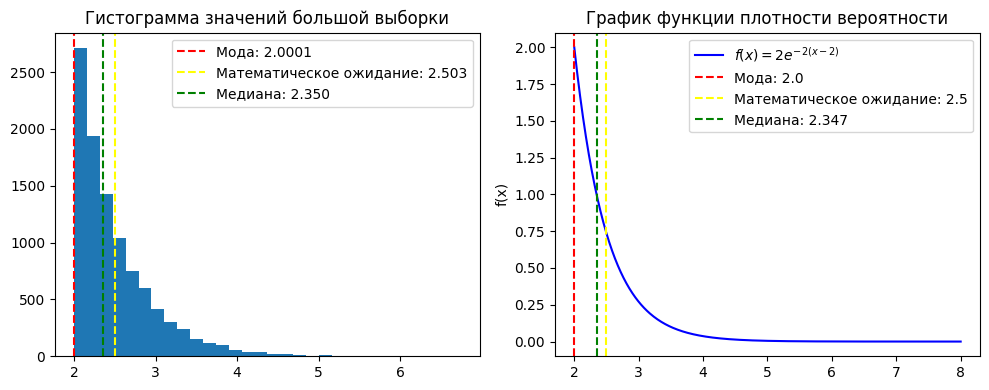

In [ ]:
import matplotlib.pyplot as plt

# Аналитические значения:
a_mode = 2
a_mean = 2.5
a_median =2.3466

# Выборочные значения
e_mode = large_sample_estimates[0]
e_mean = large_sample_estimates[1]
e_median = large_sample_estimates[2]

# Постоение графиков:
plt.figure(figsize=(10, 4))

 # Первый подграфик
plt.subplot(1, 2, 1)
plt.hist(large_sample, bins=30)
plt.axvline(x = large_sample_estimates[0], color='red', linestyle='--', label= f"Moдa: {e_mode:.4f}")
plt.axvline(x = large_sample_estimates[1], color='yellow', linestyle='--', label= f'Математическое ожидание: {e_mean:.3f}')
plt.axvline(x = large_sample_estimates[2], color='green', linestyle='--', label= f'Медиана: {e_median:.3f}')
plt.title("Гистограмма значений большой выборки")
plt.legend()

# Второй подграфик
plt.subplot(1, 2, 2)
x = np.linspace(2, 8, 400)

# Определим функцию плотности f(x) = 2e^(-2(x-2))
f_x = 2 * np.exp(-2 * (x - 2))

plt.plot(x, f_x, label=r'$f(x) = 2e^{-2(x-2)}$', color='blue')
plt.axvline(x = a_mode, color='red', linestyle='--', label= f"Moдa: {a_mode:.1f}")
plt.axvline(x = a_mean, color='yellow', linestyle='--', label= f'Математическое ожидание: {a_mean:.1f}')
plt.axvline(x = a_median, color='green', linestyle='--', label= f'Медиана: {a_median:.3f}')
plt.title("График функции плотности вероятности")
plt.ylabel("f(x)")
plt.legend()

plt.tight_layout()
plt.show()

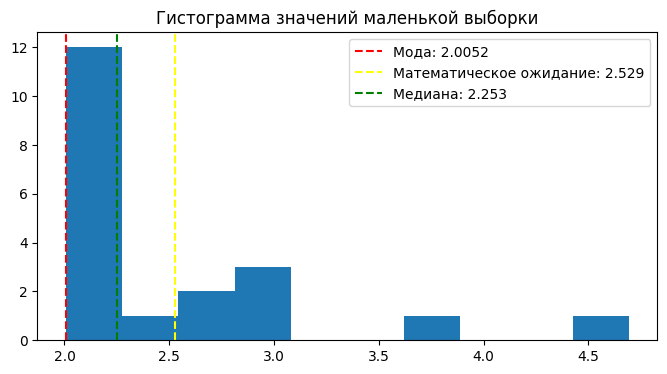

In [ ]:
e_mode = small_sample_estimates[0]
e_mean = small_sample_estimates[1]
e_median = small_sample_estimates[2]

# Постоение графиков:
plt.figure(figsize=(8, 4))

plt.hist(small_sample, bins=10)
plt.axvline(x = small_sample_estimates[0], color='red', linestyle='--', label= f"Moдa: {e_mode:.4f}")
plt.axvline(x = small_sample_estimates[1], color='yellow', linestyle='--', label= f'Математическое ожидание: {e_mean:.3f}')
plt.axvline(x = small_sample_estimates[2], color='green', linestyle='--', label= f'Медиана: {e_median:.3f}')
plt.title("Гистограмма значений маленькой выборки")
plt.legend()

plt.show()

# 3

Пусть совместное распределение двух случайных величин задано таблицей:

```
ξ\η   1,   2,   3,   .......
-1    2/5 * 1/(2^1),  2/5 * 1/(2^2),   2/5 * 1/(2^3), ...
0     1/5 * 1/(2^1),  1/5 * 1/(2^2),   1/5 * 1/(2^3), ...
1     2/5 * 1/(2^1),  2/5 * 1/(2^2),   2/5 * 1/(2^3), ...
```
где η принимает все значения из N.

Вычислить корреляционую матрицу аналитически и приближенно (на основе моделирования).

In [ ]:
import numpy as np

def generate_sample():
    # Определяем возможные значения ξ и их вероятности
    xi_vals = [-1, 0, 1]  # ξ может принимать значения -1, 0 и 1
    p_xi = [2/5, 1/5, 2/5]  # # Их вероятности

    # Случайный выбор значения ξ в соответствии с его вероятностями
    xi = np.random.choice(xi_vals, p=p_xi)  # Генерация ξ



    # Определяем возможные значения η и их вероятности
    eta_k_vals = np.arange(1, 100)  # η может принимать значения от 1 до 99
    # Вычисляем вероятности p(η = k) = 1 / (2^k) в логарифмической форме, чтобы избежать численных ошибок:
    p_eta = np.exp(-eta_k_vals * np.log(2))

    # Вероятности должны в сумме равняться 1
    p_eta /= p_eta.sum()  # Нормируем вероятности так, чтобы их сумма равнялась 1

    # Случайный выбор значения η в соответствии с его вероятностями
    eta = np.random.choice(eta_k_vals, p=p_eta)

    # Функция возвращает одну пару случайных величин (ξ,η)
    return xi, eta


# Генерируем выборку из 100000 значений пар ξ и η
num_samples = 100000
samples = np.array([generate_sample() for _ in range(num_samples)])

xi_samples = samples[:, 0]  # Выбираем ξ из выборки
eta_samples = samples[:, 1]  # Выбираем η из выборки

# Статистики
mean_xi = np.mean(xi_samples)
mean_eta = np.mean(eta_samples)
var_xi = np.var(xi_samples)
var_eta = np.var(eta_samples)
cov_xi_eta = np.cov(xi_samples, eta_samples)[0, 1]

# Корреляция
corr_xi_eta = cov_xi_eta / (np.sqrt(var_xi) * np.sqrt(var_eta))


# Вывод результатов
print(f"Mean of xi: {mean_xi}")
print(f"Mean of eta: {mean_eta}")
print(f"Variance of xi: {var_xi}")
print(f"Variance of eta: {var_eta}")
print(f"Covariance between xi and eta: {cov_xi_eta}")
print(f"Correlation between xi and eta: {corr_xi_eta}")

Mean of xi: 0.00128
Mean of eta: 1.99781
Variance of xi: 0.7991383616000001
Variance of eta: 2.0022652039000004
Covariance between xi and eta: 0.0004328075280752805
Correlation between xi and eta: 0.00034215509908071604
